# Sistema de resortes acoplados, Método de Lagrange, Resolución numérica de sistema de EDOs de $2^{\circ}$ orden


Considere un sistema como el de la imagen, con dos partículas de masa $m$ y dos resortes de constante $k$

![dosResortes.png](dosResortes.png)


1) Obtenga el Lagrangiano del sistema

2) Desarrolle las ecuaciones de Lagrange que describen el movimiento del sistema

3) Obtenga los valores de eigenfrecuencia del sistema

4) Realize una reducción a un sistema de ecuaciones diferenciales de orden 1

5) Resuelva numéricamente para obtener gráficos de la posición en función del tiempo para dos situaciones extremas

***

1) Tenemos dos grados de libertad y definimos las coordenadas generalizadas $q_1=x_1$,  $q_2=x_2$

La energía cinética está dada por:  $T=\frac{m}{2} \dot{x_1}^2 +\frac{m}{2} \dot{x_2}^2$

La energía potencial: $U= \frac{k}{2} x_1 ^2+ \frac{k}{2} (x_2 - x_1)^2= k x_1 ^2+ \frac{k}{2} x_2 ^2 -k x_2 x_1$

El Lagrangiano:  $\mathcal{L} =\frac{m}{2} \dot{x_1}^2 +\frac{m}{2} \dot{x_2}^2-k x_1 ^2- \frac{k}{2} x_2 ^2 +k x_2 x_1$

***

2) Las ecuaciones de Lagrange para este sistema son:
 
 
 $x_1: \qquad \frac{d}{dt}  \left( \frac{\partial \mathcal{L}}{\partial \dot{x_1}} \right) =\frac{\partial \mathcal{L}}{\partial x_1} \qquad m\ddot{x_1}=-2k x_1 + k x_2 \qquad  (1)$
 
 $x_2: \qquad$ $\frac{d}{dt}  \left( \frac{\partial \mathcal{L}}{\partial \dot{x_2}} \right) =\frac{\partial \mathcal{L}}{\partial x_2} \qquad m\ddot{x_2}= k x_1- k x_2  \qquad  (2)$

Tenemos un sistema de dos ecuaciones diferenciales de segundo orden que describen el movimiento en este sistema

***


3) Sabemos que $x_i(t)$ es un movimiento armónico, podemos modelarlo como $x_i(t)=A_i .cos(\omega t)$  $\Rightarrow$ 

$x_1(t)=A_1 .cos(\omega t)$  $\qquad \qquad$   $x_2(t)=A_2 cos(\omega t)$  

$\dot{x_1}(t)=-A_1 .\omega. cos(\omega t)$  $\qquad$  $\dot{x_2}(t)=-A_2. \omega  .cos(\omega t)$  

$\ddot{x_1}(t)=-A_1.\omega ^2 .cos(\omega t)$  $\qquad$  $\ddot{x_2}(t)=-A_2.\omega ^2 .cos(\omega t)$  


Reemplazando en (1) y (2) tenemos:

$-m A_1 \omega^2 cos(\omega t)=-2 k A_1 cos(\omega t)+ k A_2 cos(\omega t)$ 

$-m A_2 \omega^2 cos(\omega t)=k A_1 cos(\omega t)-2 k A_2 cos(\omega t)$ 


Simplificando y expresando en forma de matriz tenemos:


$\left[ {\begin{array}{cc}
   2k-m\omega^2 & -k \\
   -k & k-m\omega^2 \\
  \end{array} } \right]$  .
  $\left[ {\begin{array}{c}
   A_1 \\
   A_2 \\
  \end{array} } \right]$
    =
  $\left[ {\begin{array}{c}
   0 \\
   0 \\
  \end{array} } \right]$
  
  La única forma de obtener una solución no trivial es que el determinante de la matriz sea igual a cero:
  
  $\left| {\begin{array}{cc}
   2k-m\omega^2 & -k \\
   -k & k-m\omega^2 \\
  \end{array} } \right|
  = (2k-m\omega^2).(k-m\omega^2)-(-k)^2=0$
  
  Resolviendo tenemos:   $\omega^2= \frac{3 \pm \sqrt{5}}{2}$
  
  Las eigenfrecuencias serán: 
  
  $\omega_1 = 1.618 \sqrt{k/m} \qquad , \qquad \omega_2=0.618\sqrt{k/m}$
 
 Si reemplazamos estos valores en la expersión matricial obtenemos:
 
 para $\omega_1 \rightarrow  A_2=1,618 A_1 \qquad$ ,$\qquad$  para $\omega_2 \rightarrow A_2 =-0,0618 A_1$
 
 El primer caso corresponde al modo simétrico donde ambas amplitudes tienen el mismo signo
 
 El segundo caso, es el modo asimétrico con aplitudes de signo opuesto
 
 Para entender mejor que es lo que sucede en cada caso vamos a graficar el comportamiento del sistema en cada uno de ellos
  
***

4) Las ecuaciones (1) y (2) forman un sistema de EDOs de segundo orden. Despejando la aceleración para x1 y x2 obtenemos:

$\ddot{x_1}=(-2kx_1+kx_2)/m\qquad$(3)

$\ddot{x_2}=(kx_1-kx_2)/m\qquad$(4)

Para resolverlas numéricamente es conveniente transformarlas a un sistema de primer orden. Para esto vamos a realizar un cambio de variables. 

Introduciremos las funciones  $y_1 =\dot{x_1} , y_2=\dot{x_2}$, por lo tanto $\dot{y_1} =\ddot{x_1} , \dot{y_2}=\ddot{x_2}$

Entonces re escribimos el sistema de (3) y (4) como sigue:

$\dot{x_1}=y_1$

$\dot{y_1}=(-2kx_1+kx_2)/m$

$\dot{x_2}=y_2$

$\dot{y_2}=(kx_1-kx_2)/m$

Ahora tenemos un sistema equivalente de 4 ecuaciones diferenciales de primer orden

***




5)  Ahora tenemos todo lo necesario para resolver numéricamente el sistema. A continuación se muestra un ejemplo de resolución en Python 2.7

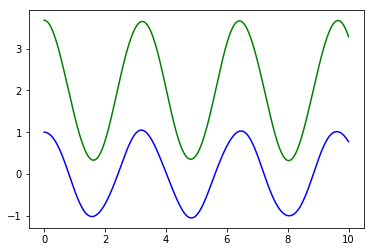

In [1]:
#Armo una función con el sistema de ecuaciones
def vectores (variables, tiempo, parametros):
    #toma los valores depara las variables  y los parámetros
    x1, y1, x2, y2 = variables
    m, k = parametros 
    #creo las funcione x1' y1' x2' y2'
    f=[y1, (-2*k*x1+k*x2)/m, y2, (-k*x2+k*x1)/m]
    #devuelve una lista de valores x1' y1' x2' y2'
    return f

#doy los valores de los parámetros 
m=1
k=10

#doy los valores de posicioń y velocidad iniciales
x1=1
y1=0
x2=1.681
y2=0

# Estos son parámetros para el solver de odes
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

#defino el intervalo de tiempo
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#empaqueto los parámetros y variables
parametros = [m, k]
variables = [x1, y1, x2, y2]

#importo la librería para resolver edos
from scipy.integrate import odeint
#ejecuto la resolución y guardo los valores con el nombre "solver"
solver = odeint(vectores, variables, t, args=(parametros,), atol=abserr, rtol=relerr)

#los valores de x1 y x2 son:
x1=solver[:,0]
x2=solver[:,2]
#Recordemos que son dos sitemas de referencia independientes

import numpy as np
#Vamos a estableces una separación entre los puntos de equilibrio de los resortes
ldist=np.full((250),2)
#Ahora definimos para un único sistema de referencia la posición 
#para la masa 1 y de la masa 2, xm1 y xm2 respectivamente
xm1=x1
xm2=x2+ldist

#magic command para jupyter
%matplotlib inline 

import matplotlib.pyplot as plt
plt.plot(t,xm1, 'b')
plt.plot(t,xm2, 'g')
plt.show()

En el ejmplo anterior se dieron valores arbitrarios de $m=1, k=10$. 

Sin embargo observe que  $x1=1.68 x2$ , esto se eligió deliberadamente para mostrar un caso de modo simétrico.

Veamos ahora que pasa si $x1=-0.68x2$

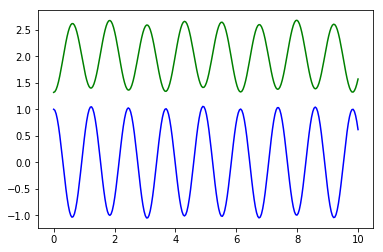

In [2]:
x1=1
x2=-0.681
variables = [x1, y1, x2, y2]
solverB = odeint(vectores, variables, t, args=(parametros,), atol=abserr, rtol=relerr)

x1B=solverB[:,0]
x2B=solverB[:,2]

xm1B=x1B
xm2B=x2B+ldist

plt.plot(t,xm1B, 'b')
plt.plot(t,xm2B, 'g')
plt.show()

En base a los resultados obtenidos se han realizado animaciones 3D 

Puede ver los videos de las animaciones en:

https://mecanicaracionalfcai.github.io/practicas_archivos/modoSim.mp4

https://mecanicaracionalfcai.github.io/practicas_archivos/modoAsim.mp4

Puede correr la simulación en su computadora y visualizar que sucede cuando cambia distintos parámetros, para ello puede descargar el código completo de este notebook para Jupyter en :

https://mecanicaracionalfcai.github.io/practicas_archivos/ResortesAcoplados.zip

Para correr esta simulación necesita tener instalado Anaconda para Python 2.7 y el módulo vpython. 



***

A continuación se muestra el código para realizar una animación 3D

Para correr este código necesita instalar el módulo vpyton que permite visualizar la simulación. 

Para iniciar la simulación debe hacer clic en kernel >> restart & run all

Para detenerla haga clic en kernel >> interrupt


Se observan 3 bloques de código claramente diferenciados:

El bloque if ANIMAR:  crea todos los elementos de la simulación pero de forma estática

La función actualizar(i)  actualiza la posición de cada objeto para un tiempo i

La función animar()  llama a la función actualizar(i) para cada instante de tiempo con un intervalo de pausa para apreciar la visualización

Para visualizar  el caso B, debe cambiar las solver[] por solverB[] dentro de la función actualizar(i), seguidamente hacer clic en kernel >> restart & run all

Puede probar que sucede cuando cambia distintos parámetros como k m x1 x2 entre otros y visualizar los graficos y simulaciones para cada caso.


In [ ]:
from vpython import *
from numpy import *
from vpython import rate

ANIMAR=True


if ANIMAR:
    canvas()
    L=10   
    wallLeft = box(pos=vec(-L,0,0), height=L/2, width=L/2, length=L/10, color=color.green)
    m1 = box(pos=vec(-L/3,0,0), height=L/3, width=L/3, length=L/5, color=color.red)
    m2 = box(pos=vec(+L/3,0,0), height=L/3, width=L/3, length=L/5, color=color.red)
    vWall=vector(wallLeft.length/2,0,0)  
    vMass=vector(m1.length/2,0,0)        
    s1 = helix(pos=wallLeft.pos+vWall, axis=(m1.pos-vMass)-(wallLeft.pos+vWall), radius=0.5)
    s2 = helix(pos=m1.pos+vMass, axis=(m2.pos-vMass)-(m1.pos+vMass), radius=0.5)
    x10=m1.pos.x  # posición de equilibrio para m1
    x20=m2.pos.x  # posición de equilibrio para m2

def actualizar(i):
    # obtiene las variables de estado
    #Para el caso B cambiar las solver[] por solverB[] y clic en kernel>>restart & run all
    x1=solverB[i,0]   # x1=solverB[i,0]
    v1=solverB[i,1]   # v1=solverB[i,1]
    x2=solverB[i,2]   # x2=solverB[i,2]
    v2=solverB[i,3]   # v2=solverB[i,3]
    m1.pos.x = x10+x1  # actualiza la posición de las masas
    m2.pos.x = x20+x2
    s1.axis = (m1.pos-vMass)-(wallLeft.pos+vWall) #actualiza el resto de las posiciones
    s2.pos = m1.pos+vMass
    s2.axis = (m2.pos-vMass)-(m1.pos+vMass)
    #s3.pos = m2.pos+vMass
    #s3.axis = (wallRight.pos-vWall)-(m2.pos+vMass)

def animar():
    while True:
        for i in range(0, len(solver)):
            rate(30)
            actualizar(i)

animar()